In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
!pip install seaborn

In [3]:
!pip install matplotlib

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
len(X_train),len(X_test)

(60000, 10000)

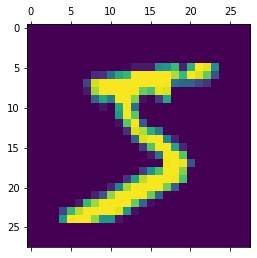

In [7]:
plt.matshow(X_train[0])


In [8]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 351us/step - loss: 0.4565 - accuracy: 0.8716
Epoch 2/5
1875/1875 [==============================] - 1s 339us/step - loss: 0.1297 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 1s 333us/step - loss: 0.0843 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 1s 330us/step - loss: 0.0662 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 331us/step - loss: 0.0491 - accuracy: 0.9843


In [75]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([1.1636075e-03, 2.0114258e-04, 4.3850502e-01, 9.1732854e-01,
       2.0508667e-05, 3.8213236e-03, 3.2608119e-07, 9.9999809e-01,
       3.3186704e-03, 5.3616860e-03], dtype=float32)

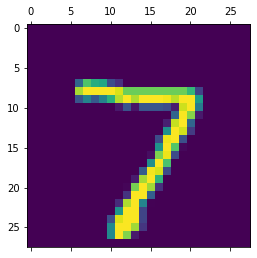

In [82]:
plt.matshow(X_test[0])

In [84]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [77]:
np.argmax(y_predicted[0])

7

In [78]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [79]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    3,    2,    4,    2,    2,    1],
       [   0, 1125,    2,    1,    0,    1,    3,    0,    3,    0],
       [   4,    5,  988,    9,    3,    0,    5,    8,   10,    0],
       [   0,    0,    2,  990,    2,    2,    0,    5,    5,    4],
       [   0,    0,    2,    0,  965,    0,    6,    0,    0,    9],
       [   2,    0,    0,    5,    1,  871,    5,    1,    4,    3],
       [   3,    2,    1,    1,    2,    4,  943,    1,    1,    0],
       [   0,    4,   10,    0,    2,    0,    0, 1001,    2,    9],
       [   1,    0,    2,    6,    4,    4,    4,    4,  943,    6],
       [   2,    3,    0,    4,   11,    4,    0,    4,    1,  980]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

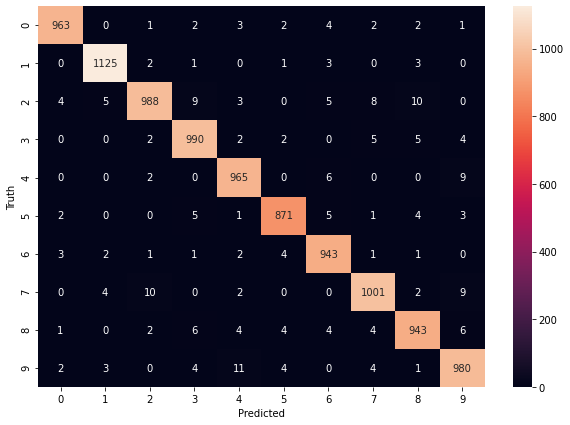

In [80]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')